In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'anime-images:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2931086%2F5048758%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240331%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240331T120037Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2c2ba551093ac52fddc4a24fa98e7bcc6d5052b13bd7ad15e61a85f27412c7cea8ac2613605dd670360152b87ae8c0864311dd9481fff480b0dfff5f09619bfbce6674a2ef1310ea02b8f8eecad278deb83df521bc2d7586248f8eba90b74d1bd5451867a20387edd8e1c7d130f2b72ee3017f3ee3da45a53742ebc5f2745d82c5be7a1df60a03274a2b4f3a2294a849ed338fa5dc2d5c467caab14fd4fe00e8db155f16a0d001ee15ce829249ae1fe24298a007c7c1757ec385532ec51a49d451cda67b0f10adf2a80a55a4e611564fe737739e40c7412d554763a31f0fd29a60bf816665ef95ea14f2578b103fbf3e45870512f913cce93c2afee955615f4a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 167528348 bytes downloaded
Downloaded and uncompressed: anime-images
Data source import complete.


In [ ]:
# Styling notebook
from IPython.core.display import HTML
css_file= """
<style>
div.input_area {
    background-color: #F1F0F0; /* gray */
    border-top: 2px solid #000000; /* black */
}

@import url('https://fonts.googleapis.com/css?family=Quicksand&display=swap');
 * {
    margin: 0;
    padding: 0;
    box-sizing: border-box;
}

 .alert {
    width: 80%;
    margin: 20px auto;
    padding: 30px;
    position: relative;
    border-radius: 5px;
    box-shadow: 0 0 15px 5px #ccc;
}
 .close {
    position: absolute;
    width: 30px;
    height: 30px;
    opacity: 0.5;
    border-width: 1px;
    border-style: solid;
    border-radius: 50%;
    right: 15px;
    top: 25px;
    text-align: center;
    font-size: 1.6em;
    cursor: pointer;
}
 .simple-alert {
    background-color: #aed6e5;
    border-left: 5px solid #245b70;
}
 .simple-alert .close {
    border-color: #245b70;
    color: #245b70;
}
 .success-alert {
    background-color: #aee5c0;
    border-left: 5px solid #24703d;
}
 .success-alert .close {
    border-color: #24703d;
    color: #24703d;
}
 .danger-alert {
    background-color: #e5aeae;
    border-left: 5px solid #702424;
}
 .danger-alert .close {
    border-color: #702424;
    color: #702424;
}
 .warning-alert {
    background-color: #ffe6a9;
    border-left: 5px solid #a97800;
}
 .warning-alert .close {
    border-color: #a97800;
    color: #a97800;
}

li {
  list-style: none; /* Remove default bullets */
}

ul li::before {
  content: "•";
  color: #dc8615;
  font-weight: bold;
  display: inline-block; /* Needed to add space between the bullet and the text */
  width: 1em; /* Also needed for space (tweak if needed) */
  margin-left: -1em; /* Also needed for space (tweak if needed) */
  font-size:120%;
}

.number{
    color:#dc8615;
}

mark {
 background-color:#FC9D2F;
 color:black;
 border-radius: 6px;
 padding: 2px 5px;
}

.btn {
  background-color: gray;
  border: none;
  color: white !important;
  padding: 5px 15px;
  font-size: 18px;
  cursor: pointer;
}

/* Darker background on mouse-over */
.btn:hover {
  background-color: #FC9D2F;
}

</style>
"""
HTML(css_file)

# <p style="background:yellow ;color:red;font-family:newtimeroman;font-size:110%;text-align:center;border-radius:10px 10px;"> Createing new faces of anime characters using Generative Adversarial Network (GAN). </p>

![dcgan.gif](attachment:dcgan.gif)

# Importing libraries

In [ ]:
import numpy as np
import random
import os
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import torch
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
from torchvision import datasets as torch_dataset
from torchvision.utils import make_grid
from torch import nn
from torch.nn import functional as F
%matplotlib inline

In [ ]:
!pip install torch-summary

In [ ]:
from torchsummary import summary

## Loading dataset(Images)

In [ ]:
rootPath = r'/kaggle/input/anime-images/GAN img'
File_name = sorted(os.listdir(rootPath))[:]
File_name

['images']

In [ ]:
sizes = [len(os.listdir(rootPath + '/' + name)) for name in File_name]
print('Number of images: ', sizes)

Number of images:  [26220]


In [ ]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

### Showing some random images and their sizes

In [ ]:
def load_random_img(dir):
    plt.figure(figsize=(2,2))
    for P in File_name:
        file = random.choice(os.listdir(f'{dir}/{P}'))
        image_path = os.path.join(f'{dir}/{P}', file)
        img=cv2.imread(image_path)
        plt.imshow(img)
        print('Image size is: ', img.shape)
        plt.grid(None)
        plt.axis('off')

Image size is:  (95, 95, 3)


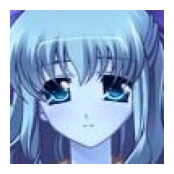

In [ ]:
load_random_img(rootPath)

Image size is:  (97, 97, 3)


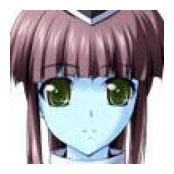

In [ ]:
load_random_img(rootPath)

Image size is:  (71, 71, 3)


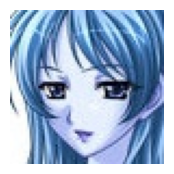

In [ ]:
load_random_img(rootPath)

### We Feed these images into the discriminator as real images. Once GAN is trained, the generator will produce realistic-looking anime faces, like the ones shown above.

#### Loading and Preprocessing Dataset

In [ ]:
# WE pass a list of transforms to be composed.
'''
- The anime face images are of varied sizes. First, resize them to a fixed size of 64 x 64.

- Then normalize, using the mean and standard deviation of 0.5. Note that both mean & variance
  have three values, as we are dealing with an RGB image.

- The normalization maps the pixel values from the range [0, 255] to the range [-1, 1].
  Mapping pixel values between [-1, 1] has proven useful while training GANs.

- Also, convert the images to torch tensors.
'''

data_dir = r'/kaggle/input/anime-images/GAN img'

data_transforms = T.Compose([
                  T.Resize((64, 64)),
                  T.ToTensor(),
                  T.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

# We load the Anime Face Dataset and apply the data_transform (resizing, normalization and converting images to tensors).
anime_dataset = torch_dataset.ImageFolder(root=data_dir, transform=data_transforms)
# It defines the training data loader, which combines the Anime dataset to provide an iterable over the dataset used while training.
dataloader = DataLoader(dataset=anime_dataset, batch_size=128, shuffle=True, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


### Looking at some images

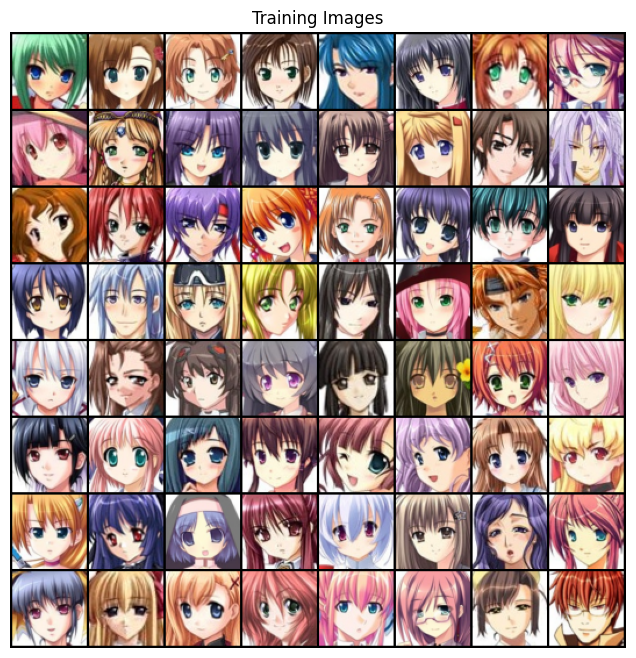

In [ ]:
# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

# Weights Initialization
### Define the weight initialization function, which is called on the generator and discriminator model layers. The function   checks if the layer passed to it is a convolution layer or the batch-normalization layer.

- All the convolution-layer weights are initialized from a zero-centered normal distribution, with a standard deviation of   0.02.
- The batch-normalization layer weights are initialized with a normal distribution, having mean 1 and a standard deviation   of 0.02. The bias is initialized with zeros.

In [ ]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

### Conv layer

In [ ]:
def Conv(n_input, n_output, k_size=4, stride=2, padding=0, bn=False):
    return nn.Sequential(
        nn.Conv2d(
            n_input, n_output,
            kernel_size=k_size,
            stride=stride,
            padding=padding, bias=False),
        nn.BatchNorm2d(n_output),
        nn.LeakyReLU(0.2, inplace=True),
        nn.Dropout(p=0.2, inplace=False))

### Deconv layer

In [ ]:
def Deconv(n_input, n_output, k_size=4, stride=2, padding=1):
    return nn.Sequential(
        nn.ConvTranspose2d(
            n_input, n_output,
            kernel_size=k_size,
            stride=stride, padding=padding,
            bias=False),
        nn.BatchNorm2d(n_output),
        nn.ReLU(inplace=True))

# Generator Network

In [ ]:
class Generator(nn.Module):
    def __init__(self, z=100, nc=64):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            Deconv(z, nc*8, 4,1,0),
            Deconv(nc*8, nc*4, 4,2,1),
            Deconv(nc*4, nc*2, 4,2,1),
            Deconv(nc*2, nc, 4,2,1),
            nn.ConvTranspose2d(nc,3, 4,2,1,bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.net(input)

# Discriminator Network

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, nc=64):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(
                3, nc,
                kernel_size=4,
                stride=2,
                padding=1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            Conv(nc, nc*2, 4,2,1),
            Conv(nc*2, nc*4, 4,2,1),
            Conv(nc*4, nc*8, 4,2,1),
            nn.Conv2d(nc*8, 1,4,1,0, bias=False),
            nn.Sigmoid())
    def forward(self, input):
        return self.net(input)

### Applying the model

In [ ]:
#device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

dis_model = Discriminator()
gen_model = Generator()

gen_model.apply(weights_init)
dis_model.apply(weights_init)
dis_model.to(device)
gen_model.to(device)
print('init model')

init model


In [ ]:
gen_model

Generator(
  (net): Sequential(
    (0): Sequential(
      (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (3): Sequential(
      (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [ ]:
dis_model

Discriminator(
  (net): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
      (3): Dropout(p=0.2, inplace=False)
    )
    (3): Sequential(
      (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
      (3): Dropout(p=0.2, inplace=False)
    )
    (4): Sequential(
      (0): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2):

In [ ]:
summary(gen_model, (100,1,1))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 3, 64, 64]           --
|    └─Sequential: 2-1                   [-1, 512, 4, 4]           --
|    |    └─ConvTranspose2d: 3-1         [-1, 512, 4, 4]           819,200
|    |    └─BatchNorm2d: 3-2             [-1, 512, 4, 4]           1,024
|    |    └─ReLU: 3-3                    [-1, 512, 4, 4]           --
|    └─Sequential: 2-2                   [-1, 256, 8, 8]           --
|    |    └─ConvTranspose2d: 3-4         [-1, 256, 8, 8]           2,097,152
|    |    └─BatchNorm2d: 3-5             [-1, 256, 8, 8]           512
|    |    └─ReLU: 3-6                    [-1, 256, 8, 8]           --
|    └─Sequential: 2-3                   [-1, 128, 16, 16]         --
|    |    └─ConvTranspose2d: 3-7         [-1, 128, 16, 16]         524,288
|    |    └─BatchNorm2d: 3-8             [-1, 128, 16, 16]         256
|    |    └─ReLU: 3-9                    [-1, 128, 16, 16]     

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 3, 64, 64]           --
|    └─Sequential: 2-1                   [-1, 512, 4, 4]           --
|    |    └─ConvTranspose2d: 3-1         [-1, 512, 4, 4]           819,200
|    |    └─BatchNorm2d: 3-2             [-1, 512, 4, 4]           1,024
|    |    └─ReLU: 3-3                    [-1, 512, 4, 4]           --
|    └─Sequential: 2-2                   [-1, 256, 8, 8]           --
|    |    └─ConvTranspose2d: 3-4         [-1, 256, 8, 8]           2,097,152
|    |    └─BatchNorm2d: 3-5             [-1, 256, 8, 8]           512
|    |    └─ReLU: 3-6                    [-1, 256, 8, 8]           --
|    └─Sequential: 2-3                   [-1, 128, 16, 16]         --
|    |    └─ConvTranspose2d: 3-7         [-1, 128, 16, 16]         524,288
|    |    └─BatchNorm2d: 3-8             [-1, 128, 16, 16]         256
|    |    └─ReLU: 3-9                    [-1, 128, 16, 16]     

In [ ]:
summary(dis_model, (3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1, 1, 1]             --
|    └─Conv2d: 2-1                       [-1, 64, 32, 32]          3,072
|    └─LeakyReLU: 2-2                    [-1, 64, 32, 32]          --
|    └─Sequential: 2-3                   [-1, 128, 16, 16]         --
|    |    └─Conv2d: 3-1                  [-1, 128, 16, 16]         131,072
|    |    └─BatchNorm2d: 3-2             [-1, 128, 16, 16]         256
|    |    └─LeakyReLU: 3-3               [-1, 128, 16, 16]         --
|    |    └─Dropout: 3-4                 [-1, 128, 16, 16]         --
|    └─Sequential: 2-4                   [-1, 256, 8, 8]           --
|    |    └─Conv2d: 3-5                  [-1, 256, 8, 8]           524,288
|    |    └─BatchNorm2d: 3-6             [-1, 256, 8, 8]           512
|    |    └─LeakyReLU: 3-7               [-1, 256, 8, 8]           --
|    |    └─Dropout: 3-8                 [-1, 256, 8, 8]           --


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1, 1, 1]             --
|    └─Conv2d: 2-1                       [-1, 64, 32, 32]          3,072
|    └─LeakyReLU: 2-2                    [-1, 64, 32, 32]          --
|    └─Sequential: 2-3                   [-1, 128, 16, 16]         --
|    |    └─Conv2d: 3-1                  [-1, 128, 16, 16]         131,072
|    |    └─BatchNorm2d: 3-2             [-1, 128, 16, 16]         256
|    |    └─LeakyReLU: 3-3               [-1, 128, 16, 16]         --
|    |    └─Dropout: 3-4                 [-1, 128, 16, 16]         --
|    └─Sequential: 2-4                   [-1, 256, 8, 8]           --
|    |    └─Conv2d: 3-5                  [-1, 256, 8, 8]           524,288
|    |    └─BatchNorm2d: 3-6             [-1, 256, 8, 8]           512
|    |    └─LeakyReLU: 3-7               [-1, 256, 8, 8]           --
|    |    └─Dropout: 3-8                 [-1, 256, 8, 8]           --


## Loss Function & Optimization

In [ ]:
from torch import optim

real_label = 1.
fake_label = 0.
lr = 0.0002
beta1 = 0.5

# Loss Function
criterion = nn.BCELoss()
# Optimizer
optim_D = optim.Adam(dis_model.parameters(), lr=lr, betas=(beta1, 0.999))
optim_G = optim.Adam(gen_model.parameters(), lr=lr, betas=(beta1, 0.999))

# Train Mode

In [ ]:
img_list = []
G_losses = []
D_losses = []
iters = 1
epoch_nb = 30
fixed_noise = torch.randn(32, 100, 1,1, device=device)
D_x = 0

# Training the Networks

In [ ]:
from torch.distributions.uniform import Uniform

for epoch in range(epoch_nb):
    for i, data in enumerate(dataloader):
        # Train Discriminator
        ## Train with real image
        dis_model.zero_grad()
        real_img = data[0].to(device)
        bz = real_img.size(0)

        #  label smoothing
        label = Uniform(0.9, 1.0).sample((bz,)).to(device)
#         label = torch.full((bz,), real_label, device=device, dtype=torch.float)

        output = dis_model(real_img).view(-1)
        error_real = criterion(output, label)
        error_real.backward()
        D_x = output.mean().item()

        ## Train with fake image
        noise = torch.randn(bz, 100, 1,1, device=device)
        fake_img = gen_model(noise)
        label = Uniform(0., 0.05).sample((bz,)).to(device)

        output = dis_model(fake_img.detach()).view(-1)
        error_fake = criterion(output, label)
        error_fake.backward()
        D_G_z1 = output.mean().item()
        error_D = error_real + error_fake
#         error_D.backward()
        optim_D.step()

        ## Train Generator
        gen_model.zero_grad()
#         noise = torch.randn(bz, 100, 1,1, device=device)
#         fake_img = gen_model(noise)
        label = Uniform(0.95, 1.0).sample((bz,)).to(device)
        output = dis_model(fake_img).view(-1)
        error_G = criterion(output, label)
        error_G.backward()
        optim_G.step()
        D_G_z2 = output.mean().item()

        if i % 300 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, epoch_nb, i, len(dataloader),
                     error_D.item(), error_G.item(), D_x, D_G_z1, D_G_z2))
        if epoch > 1:
            if (iters % 1000 == 0) or ((epoch == epoch_nb-1) and (i == len(dataloader)-1)):
                with torch.no_grad():
                    fake_img = gen_model(fixed_noise).detach().cpu()
                fake_img = make_grid(fake_img, padding=2, normalize=True)
                img_list.append(fake_img)
                plt.figure(figsize=(10,10))
                plt.imshow(img_list[-1].permute(1,2,0))
                plt.show()

        iters += 1

[0/30][0/205]	Loss_D: 1.5303	Loss_G: 4.6322	D(x): 0.7048	D(G(z)): 0.5628 / 0.0178


## Animated show of generated images

In [ ]:
from matplotlib import animation
from IPython.display import HTML

fig = plt.figure(figsize=(8,8))
plt.axis("off")
imgs = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
img_animation = animation.ArtistAnimation(fig, imgs, interval=1000, repeat_delay=100, blit=True)
HTML(img_animation.to_jshtml())